# Equations

## Necessary imports

In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Constants

In [2]:
####### Définitions des variables
ELRbase0 = 1600.
SUPthreshold = 0.2
CELLShive0 = 250000
x1, x2, x3, x4, x5 = 385, 30, 36, 155, 30
LIFESPANegg = 3
LIFESPANlarva = 5
LIFESPANpupa = 12
MORTALITYeggs = 0.03
MORTALITYlarvae = 0.01
MORTALITYpupae = 0.001
CANNIBALISMhungerbase = [0.23, 0.3, 0.58, 0.06, 0] # for i in [1,2,...,5]
MORTALITYbase = 0.01
MORTALITYnursing = 0.005
MORTALITYprocessing = 0.005
MORTALITYforaging = 0.035
LOADpollenforager = 0.06
LOADnectarforager = 0.04
TURNSnectarforager = 15
TURNSpollenforager = 10
FACTORforagingsuccess = 0.8
FACTORminpollenforagers = 0.01
FACTORforagingmax = 0.33
ProcessorsPerCell = 2
FACTORpollenstorage = 6
FACTORpollensavingmax = 0.3
RATIOnectar_to_honey = 0.4 # 20/50
w_nectar = 0.43
w_pollen = 0.23
w_cellsbase = 0.037
w_honey = 0.5
w_egg = 0.0001
w_pupa = 0.16
w_adult = 0.1
w_larva = [0.0002,0.00059, 0.00331, 0.0644, 0.160] # for i in [1,...,5]
w_hivebase = 14000 #("14,000g")
ERLstochrange = 0.05

INITpollen = 0
INITnectar = 0
INIThoney = 50000
INITBEESadult = 15000
INITCELLSbrood = 0
INITWEIGHTcolony = 50

#######Creations des tableaux
#STORESpollenTab = np.zeros(366)
#STOREShoneyTab = np.zeros(366)
#STORESnectarTab = np.zeros(366)
#BroodCellsTab = np.zeros(366)
#BEESadultTab = np.zeros(366)
#WEIGHTcolonyTab = np.zeros(366)
#t = np.arange(366)
opt = 8 # equation choice (7 or 8) for CELLSeggs(t)
opt2 = 12 # equation choice (12 or 13) for CELLSlarvae(t)
opt3 = 15 # equation choice (15 or 16) for CELLSpupae(t)


## Initialisations

In [3]:
####### Initialisation des valeurs à 0
#STORESpollenTab[0] = 0
#STOREShoneyTab[0] = 50000
#STORESnectarTab[0] = 0
#BroodCellsTab[0] = 0
#BEESadultTab[0] = 15000
#WEIGHTcolonyTab[0] = 50

####### Creation du dataframe
#ar = np.array([STORESpollenTab,STOREShoneyTab,STORESnectarTab,BroodCellsTab,BEESadultTab,WEIGHTcolonyTab])
#dFResult= pd.DataFrame({'STORESpollen' : STORESpollenTab, 'STOREShoney' : STOREShoneyTab, 'STORESnectar' : STORESnectarTab, 'BroodCells' : BroodCellsTab,'BEESadult' : BEESadultTab,'WEIGHTcolony' : WEIGHTcolonyTab})

####### Parameter swarming day
swd = 1400000

####### Test
NECTARNEEDlarva = np.arange(1,6,1.0)
POLLENNEEDlarva = np.arange(1,6,1.0)

####### Définitions des variables "inconnues"
POLLENNEEDadult = 1
POLLENNEEDnurse = 1
NECTARNEEDactiveforager = 1
NECTARNEEDadult = 1
NECTARNEEDnurse = 1
NEEDnurses_per_larva = [1,1,1,1,1]
NEEDnurses_per_egg = 1
NEEDnurses_per_pupa = 1
MORTALITYadultbase = 0.05

### Array Initialisations

In [4]:
global CELLSemptyArray, SUPcombArray, ELRArray, CELLSeggsArray, CELLSlarvaeArray, CELLSpupaeArray, CELLSbroodArray, MORTALITYadultArray, BEESadultArray, INDEXflightArray, INDEXnectaroutsideArray, INDEXpollenoutsideArray, NEEDworkersArray, RATIOworkforceArray, NEEDnursesArray, NursesArray, INDEXnursingqualityArray, FORAGERSArray, FORAGERSactiveArray, NEEDpollenArray, NEEDpollen_larvaeArray, NEEDpollen_adultArray, NEEDpollenincomeArray, NEEDpollenforagerArray, FORAGERSpollenArray, FORAGERSpollenactiveArray, NEEDnectarArray, NEEDnectar_larvaeArray, NEEDnectar_adultArray, WORKFORCEnectarArray, FORAGERSnectarArray, FORAGERSnectaractiveArray, INCOMEpollenArray, INCOMEnectarArray, INDEXpollensituationArray, NEEDprocessorsArray, PROCESSORSArray, PROCESSEDnectarArray, USAGEpollenArray, STORESpollenArray, USAGEnectarArray, USAGEhoneyArray, STORESnectarArray, STOREShoneyArray, WEIGHTcolonyArray, BEESlazyArray
CELLSemptyArray = []
SUPcombArray = []
ELRArray = []
CELLSeggsArray = []
CELLSlarvaeArray = []
CELLSpupaeArray = []
CELLSbroodArray = []
MORTALITYadultArray = []
BEESadultArray = []
INDEXflightArray = []
INDEXnectaroutsideArray = []
INDEXpollenoutsideArray = []
NEEDworkersArray = []
NEEDnursesArray = []
RATIOworkforceArray = []
NursesArray = []
INDEXnursingqualityArray = []
FORAGERSArray = []
FORAGERSactiveArray = []
NEEDpollenArray = []
NEEDpollen_larvaeArray = []
NEEDpollen_adultArray = []
NEEDpollenincomeArray = []
NEEDpollenforagerArray = []
FORAGERSpollenArray = []
FORAGERSpollenactiveArray = []
NEEDnectarArray = []
NEEDnectar_larvaeArray = []
NEEDnectar_adultArray = []
WORKFORCEnectarArray = []
FORAGERSnectarArray = []
FORAGERSnectaractiveArray = []
INCOMEpollenArray = []
INCOMEnectarArray = []
INDEXpollensituationArray = []
NEEDprocessorsArray = []
PROCESSORSArray = []
PROCESSEDnectarArray = []
USAGEpollenArray = []
STORESpollenArray = []
USAGEnectarArray = []
USAGEhoneyArray = []
STORESnectarArray = []
STOREShoneyArray = []
WEIGHTcolonyArray = []
BEESlazyArray = []

## 2.1.   Modeling the queen’s egg laying behavior

In [5]:
def season(t):
    # (1)
    return max(1-(1/(1+x1*math.exp(-2*t/x2))),1/(1+x3*math.exp(-2*(t-x4)/x5)))

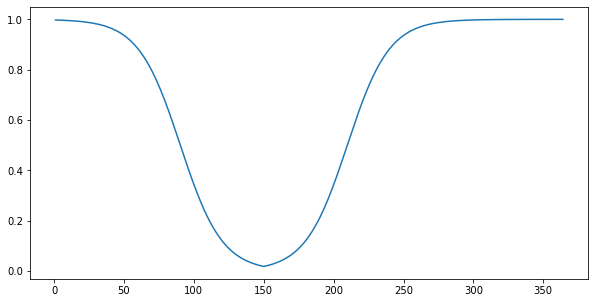

In [6]:
import matplotlib.pyplot as plt
import numpy as np

graph = []

for i in range(364):
    graph.append(season(i))

plt.figure(figsize=(10,5))
plt.plot(np.linspace(1,364, 364), graph)

In [7]:
def CELLSempty(t):
    # (2)
    global CELLSemptyArray
    if t>len(CELLSemptyArray):
        CELLSempty(t-1)
    if t==len(CELLSemptyArray):
        res = CELLShive(t) - CELLSbrood(t) - STORESpollen(t) - STORESnectar(t) - STOREShoney(t)
        CELLSemptyArray = np.append(CELLSemptyArray, res)
    return CELLSemptyArray[t]

In [8]:
def SUPcomb(t):
    # (3)
    global SUPcombArray
    if t>len(SUPcombArray):
        SUPcomb(t-1)
    if t == len(SUPcombArray):
        if CELLSempty(t)/(CELLShive(t) + 1) < SUPthreshold:
            res = CELLSempty(t)/((CELLShive(t) + 1) * SUPthreshold)
        else:
            res = 1
        SUPcombArray = np.append(SUPcombArray, res)
    return SUPcombArray[t]

In [9]:
def ELRstoch(t):
    # (4)
    return random.uniform(-ERLstochrange,ERLstochrange)

In [10]:
def ELR(t):
    # (5)
    global ELRArray
    if t > len(ELRArray):
        ELR(t-1)
    if t == len(ELRArray):
        res = ELRbase(t) * (1 + ELRstoch(t)) * (1 - season(t)) * SUPcomb(t)
        ELRArray = np.append(ELRArray, res)
    return ELRArray[t]

## 2.2. Modeling the immature stages

### 2.2.1 Eggs

In [11]:
def EGGS(i,t):
    # (6)
    if t==0:
        res = 0
    elif i == 1:
        res = ELR(t-1) * (1 - MORTALITYeggs)
    elif i in [2,3]:
        res = EGGS(i-1,t-1) * (1 - MORTALITYeggs)
    return res

In [12]:
def CELLSeggs(t):
    # (7)
    global CELLSeggsArray
    if t > len(CELLSeggsArray):
        CELLSeggs(t-1)
    if t == len(CELLSeggsArray):
        sum = 0
        for i in range(1,LIFESPANegg):
            sum += EGGS(i,t)
        CELLSeggsArray = np.append(CELLSeggsArray, sum)
    return CELLSeggsArray[t]

### 2.2.2. Larvae (unsealed)

In [13]:
def SURVIVALlarvae(i,t):
    # (9)
    return (1 - CANNIBALISMlarvae(i,t)) * (1 - MORTALITYlarvae)

In [14]:
def CANNIBALISMlarvae(i,t):
    # (10)
    if t == 0:
        res = 0
    else:
        res = CANNIBALISMhungerbase[i-1] * (1 - (INDEXpollensituation(t-1) * INDEXnursingquality(t-1)))
    return res

In [15]:
def LARVAE(i,t):
    # (11)
    if t==0:
        res = 0
    elif i == 1:
        res = EGGS(LIFESPANegg,t-1)*SURVIVALlarvae(1,t)
    elif 1 < i and i <= LIFESPANlarva:
        res = LARVAE(i-1,t-1) * SURVIVALlarvae(i,t)
    return res

In [16]:
def CELLSlarvae(t):
    # (12)
    global CELLSlarvaeArray
    if t > len(CELLSlarvaeArray):
        CELLSlarvae(t-1)
    if t == len(CELLSlarvaeArray):
        sum = 0
        for i in range(1, LIFESPANlarva):
            sum += LARVAE(i,t)
        CELLSlarvaeArray = np.append(CELLSlarvaeArray, sum)
    return CELLSlarvaeArray[t] 

In [17]:
# def CELLSlarvae13(t):
#     # (13)
#     # alternative to (12)
    
#     def product(i):
#         prdct = 1
#         for k in range(i+1):
#             if k != 0:
#                 prdct *= SURVIVALlarvae(k,t-i+k)
#         return prdct
    
#     sum = 0
#     for i in range(LIFESPANlarva+1):
#         if i != 0:
#             sum += (ELR(t-i-LIFESPANegg)*math.pow(1-MORTALITYeggs,i)*product(i))  
    
#     return sum

In [18]:
# def CELLSlarvae(t,opt):
#     # (12) / (13)
#     if opt == 12:
#         return CELLSlarvae12(t)
#     elif opt == 13:
#         return CELLSlarvae13(t)
#     else:
#         raise Exception("opt must be 12 or 13")

In [19]:
#VOIR INIT
def PUPAE(i,t):
    # (14)
    if t==0:
        res =0
    elif i == 1:
        res = LARVAE(LIFESPANlarva,t-1) * (1 - MORTALITYpupae)
    elif 1 < i and i <= LIFESPANpupa:
        res = PUPAE(i-1,t-1) * (1 - MORTALITYpupae)
    return res

In [20]:
def CELLSpupae(t):
    # (15)
    global CELLSpupaeArray
    if t > len(CELLSpupaeArray):
        CELLSpupae(t-1)
    if t == len(CELLSpupaeArray):
        sum = 0
        for i in range(1,LIFESPANpupa):
            sum += PUPAE(i,t)
        CELLSpupaeArray = np.append(CELLSpupaeArray, sum)
    return CELLSpupaeArray[t] 

In [21]:
# def CELLSpupae16(t):
#     # (16)
#     # alternative to (15)
    
#     def product(i):
#         prdct = 1
#         for k in range(LIFESPANlarva+1):
#             if k != 0:
#                 prdct *= SURVIVALlarvae(k,t-i-LIFESPANlarva+k)
#         return prdct
    
#     sum = 0
#     for i in range(LIFESPANpupa+1):
#         if i != 0:
#             sum += (ELR(t-i-LIFESPANegg-LIFESPANlarva)*math.pow(1-MORTALITYeggs,LIFESPANegg)*product(i)*math.pow(1-MORTALITYpupae,i))  
    
#     return sum

In [22]:
# def CELLSpupae(t,opt):
#     # (15) / (16)
#     if opt == 15:
#         return CELLSpupae15(t)
#     elif opt == 16:
#         return CELLSpupae16(t)
#     else:
#         raise Exception("opt must be 15 or 16")

In [23]:
def CELLSbrood(t):
    # (17)
    global CELLSbroodArray
    if t > len(CELLSbroodArray):
        CELLSbrood(t-1)
    if t == len(CELLSbroodArray):
        if t==0:
            res = INITCELLSbrood
        else:
            res = CELLSeggs(t) + CELLSlarvae(t) + CELLSpupae(t)
        CELLSbroodArray = np.append(CELLSbroodArray, res)
    return CELLSbroodArray[t]

## 2.3 Modeling the population of adult bees

In [24]:
def MORTALITYadult(t) :
    # (18)
    global MORTALITYadultArray
    if t > len(MORTALITYadultArray):
        MORTALITYadult(t-1)
    if t == len(MORTALITYadultArray):
        if t == 0:
            res = MORTALITYadultbase
        else:
            res = MORTALITYadultbase
            res += (MORTALITYnursing * NURSES(t - 1) / (BEESadult(t - 1) + 1))
            res += (MORTALITYprocessing * PROCESSORS(t - 1) / (BEESadult(t - 1) + 1))
            res += (MORTALITYforaging * FORAGERSactive(t - 1) / (BEESadult(t - 1) + 1))
        MORTALITYadultArray = np.append(MORTALITYadultArray, res)
    return MORTALITYadultArray[t]

In [25]:
def BEESadult(t) : 
    # (19)
    global BEESadultArray
    if t>len(BEESadultArray):
        BEESadult(t-1)
    if t==len(BEESadultArray):
        if t==0:
            res = INITBEESadult
        else:
            res = (BEESadult(t-1) + PUPAE(LIFESPANpupa, t-1))*(1 - MORTALITYadult(t) - BEESswarm(t))
        BEESadultArray = np.append(BEESadultArray, res)
    return BEESadultArray[t]

## 2.4 Modeling the influence of the environment

In [26]:
#VOIR ICI
def INDEXrain(t) :
    # (20)
	return (1 - RAIN(t))

In [27]:
#VOIR ICI
def RAIN(t) :
    # (21)
    #res = HOURSraining_during_daylight(t) / HOURSdaylight(t)
    res = random.random()
    return res

In [28]:
#VOIR ICI
def TEMP(t):
    return random.uniform(13,41)

def INDEXtemperature(t) :
    # (22)
	if ((TEMP(t) <= 14) or (TEMP(t) > 40)) :
		res = 0
	elif (TEMP(t) <= 22) :
		res = (TEMP(t) - 14) / 8
	elif (TEMP(t) <= 32) : 
		res = 1
	else : 
		res = (40 - TEMP(t)) / 8 

	return res

In [29]:
def INDEXflight(t): 
    # (23)
    global INDEXflightArray
    if t > len(INDEXflightArray):
        INDEXflight(t-1)
    if t == len(INDEXflightArray):
        res = (INDEXrain(t) * INDEXtemperature(t))
        INDEXflightArray = np.append(INDEXflightArray, res)
    return INDEXflightArray[t]

In [30]:
def INDEXnectaroutside(t) :
    # (24)
    global INDEXnectaroutsideArray
    if t > len(INDEXnectaroutsideArray):
        INDEXnectaroutside(t-1)
    if t == len(INDEXnectaroutsideArray):
        res = min((1 - season(t)) * 1.5, 1)
        INDEXnectaroutsideArray = np.append(INDEXnectaroutsideArray, res)
    return INDEXnectaroutsideArray[t]

In [31]:
def INDEXpollenoutside(t) :
    # (25)
    global INDEXpollenoutsideArray
    if t > len(INDEXpollenoutsideArray):
        INDEXpollenoutside(t-1)
    if t == len(INDEXpollenoutsideArray):
        res = min((1 - season(t)) * 1.5, 1)
        INDEXpollenoutsideArray = np.append(INDEXpollenoutsideArray, res)
    return INDEXpollenoutsideArray[t]

## 2.5 Modeling task decisions

In [32]:
def NEEDworkers(t):
    # (26)
    global NEEDworkersArray
    if t > len(NEEDworkersArray):
        NEEDworkers(t-1)
    if t == len(NEEDworkersArray):
        res = NEEDnurses(t) + NEEDpollenforagers(t)
        NEEDworkersArray = np.append(NEEDworkersArray, res)
    return NEEDworkersArray[t]

In [33]:
FACTORothertasks = 0.2
def RATIOworkforce(t):
    # (27)
    global RATIOworkforceArray
    if t > len(RATIOworkforceArray):
        RATIOworkforce(t-1)
    if t == len(RATIOworkforceArray):
        res = min(BEESadult(t) * (1 - FACTORothertasks) / (NEEDworkers(t) + 1), 1)
        RATIOworkforceArray = np.append(RATIOworkforceArray, res)
    return RATIOworkforceArray[t]

## 2.6 Modeling the regulation of nursing

In [34]:
def NEEDnurses(t):
    # (28)
    global NEEDnursesArray
    if t > len(NEEDnursesArray):
        NEEDnurses(t-1)
    if t == len(NEEDnursesArray):
        res = 0
    for i in range(1, LIFESPANlarva):
        res = LARVAE(i, t) * NEEDnurses_per_larva[i]
        res += CELLSeggs(t) * NEEDnurses_per_egg + CELLSpupae(t) * NEEDnurses_per_pupa
        NEEDnursesArray = np.append(NEEDnursesArray,res)
    return NEEDnursesArray[t]

In [35]:
def NURSES(t):
    # (29)
    global NursesArray
    if t > len(NursesArray):
        NURSES(t-1)
    if t==len(NursesArray):
        res = NEEDnurses(t) * RATIOworkforce(t)
        NursesArray = np.append(NursesArray,res)
    return NursesArray[t]

In [36]:
def INDEXnursingquality(t):
    # (30)
    global INDEXnursingqualityArray
    if t>len(INDEXnursingqualityArray):
        INDEXnursingquality(t-1)
    if t==len(INDEXnursingqualityArray):
        res = NURSES(t)/(NEEDnurses(t) + 1)
        INDEXnursingqualityArray = np.append(INDEXnursingqualityArray,res)
    return INDEXnursingqualityArray[t]

## 2.7 Modeling the regulation of foraging

In [37]:
def FORAGERS(t):
    # (31) represents the available workforce for the foraging task.
    global FORAGERSArray
    if t>len(FORAGERSArray):
        FORAGERS(t-1)
    if t==len(FORAGERSArray):
        res = FORAGERSpollen(t)+FORAGERSnectaractive(t)
        FORAGERSArray = np.append(FORAGERSArray,res)
    return FORAGERSArray[t]

In [38]:
def FORAGERSactive(t):
    # (32) represents the actual number of foragers that fly out
    global FORAGERSactiveArray
    if t>len(FORAGERSactiveArray):
        FORAGERSactive(t-1)
    if t==len(FORAGERSactiveArray):
        res = FORAGERSpollenactive(t)+FORAGERSnectaractive(t)
        FORAGERSactiveArray = np.append(FORAGERSactiveArray,res)
    return FORAGERSactiveArray[t]

### 2.7.1 Recruitment of pollen foragers

In [39]:
def NEEDpollen(t):
    # (33) calculate the colony’s pollen demand
    global NEEDpollenArray
    if t>len(NEEDpollenArray):
        NEEDpollen(t-1)
    if t==len(NEEDpollenArray):
        res = NEEDpollen_larvae(t)+NEEDpollen_adult(t)
        NEEDpollenArray = np.append(NEEDpollenArray,res)
    return NEEDpollenArray[t]

In [40]:
def NEEDpollen_larvae(t):
    # (34) represents the pollen demand of larvae of all ages
    global NEEDpollen_larvaeArray
    if t>len(NEEDpollen_larvaeArray):
        NEEDpollen_larvae(t-1)
    if t==len(NEEDpollen_larvaeArray):
        result = 0
        for i in range(1,LIFESPANlarva):
            result+= (POLLENNEEDlarva[i-1]*(LARVAE(i,t)))
        NEEDpollen_larvaeArray = np.append(NEEDpollen_larvaeArray,result)
    return NEEDpollen_larvaeArray[t]

In [41]:
def NEEDpollen_adult(t):
    # (35) represents the adult’s pollen demand
    global NEEDpollen_adultArray
    if t>len(NEEDpollen_adultArray):
        NEEDpollen_adult(t-1)
    if t==len(NEEDpollen_adultArray): 
        result = BEESadult(t) * POLLENNEEDadult + NURSES(t) * POLLENNEEDnurse
        NEEDpollen_adultArray = np.append(NEEDpollen_adultArray,result)
    return NEEDpollen_adultArray[t]

In [42]:
def NEEDpollenincome(t):
    # (36) represents the daily need for pollen income
    global NEEDpollenincomeArray
    if t>len(NEEDpollenincomeArray):
        NEEDpollenincome(t-1)
    if t==len(NEEDpollenincomeArray):
        S = 0
        if t==0:
            S = 0
        elif t==1:
            S += NEEDpollen(t)
            S += NEEDpollen(t-1)
        else:
            S += NEEDpollen(t)
            S += NEEDpollen(t-1)
            S += NEEDpollen(t-2)
        tmp = S/3 * FACTORpollenstorage - STORESpollen(t)
        result = max(0,tmp)
        NEEDpollenincomeArray = np.append(NEEDpollenincomeArray,result)
    return NEEDpollenincomeArray[t]

In [43]:
def NEEDpollenforagers(t):
    # (37) models the number of pollen foragers needed according to the current need for additional pollen.
    global NEEDpollenforagerArray
    if t>len(NEEDpollenforagerArray):
        NEEDpollenforagers(t-1)
    if t==len(NEEDpollenforagerArray):
        if t==0:
            result = NEEDpollenincome(0) / (LOADpollenforager * TURNSpollenforager * FACTORforagingsuccess)
        else:
            result = NEEDpollenincome(t-1) / (LOADpollenforager * TURNSpollenforager * FACTORforagingsuccess)
        NEEDpollenforagerArray = np.append(NEEDpollenforagerArray,result)
    return NEEDpollenforagerArray[t]

In [44]:
def FORAGERSpollen(t):
    # (38) models the potential number of pollen foragers each day
    global FORAGERSpollenArray
    if t>len(FORAGERSpollenArray):
        FORAGERSpollen(t-1)
    if t==len(FORAGERSpollenArray):
        max1 = NEEDpollenforagers(t) * RATIOworkforce(t)
        max2 = (BEESadult(t)-NURSES(t))*FACTORminpollenforagers
        min1 = max(max1,max2)
        min2 = BEESadult(t) * FACTORforagingmax
        result = min(min1,min2)
        FORAGERSpollenArray = np.append(FORAGERSpollenArray,result)
    return FORAGERSpollenArray[t]

In [45]:
def FORAGERSpollenactive(t):
    # (39) models the number of foragers that actually leave the hive for foraging flights
    global FORAGERSpollenactiveArray
    if t>len(FORAGERSpollenactiveArray):
        FORAGERSpollenactive(t-1)
    if t==len(FORAGERSpollenactiveArray):
        result = FORAGERSpollen(t) * INDEXflight(t) * INDEXpollenoutside(t)
        FORAGERSpollenactiveArray = np.append(FORAGERSpollenactiveArray,result)
    return FORAGERSpollenactiveArray[t]




### 2.7.2 Recruitment of nectar foragers

In [46]:
def NEEDnectar(t):
    # (40) model the demand for nectar
    global NEEDnectarArray
    if t>len(NEEDnectarArray):
        NEEDnectar(t-1)
    if t==len(NEEDnectarArray):
        result = NEEDnectar_larvae(t) + NEEDnectar_adult(t)
        NEEDnectarArray = np.append(NEEDnectarArray,result)
    return NEEDnectarArray[t]

In [47]:
def NEEDnectar_larvae(t):
    # (41) model the demand for larvae nectar
    global NEEDnectar_larvaeArray
    if t>len(NEEDnectar_larvaeArray):
        NEEDnectar_larvae(t-1)
    if t==len(NEEDnectar_larvaeArray):
        result = 0
        for i in range(1,LIFESPANlarva):
            result += NECTARNEEDlarva[i-1] * LARVAE(i,t)
        NEEDnectar_larvaeArray = np.append(NEEDnectar_larvaeArray,result)
    return NEEDnectar_larvaeArray[t]

In [48]:
def NEEDnectar_adult(t):
    # (42)model the demand for adult nectar
    global NEEDnectar_adultArray
    if t>len(NEEDnectar_adultArray):
        NEEDnectar_adult(t-1)
    if t==len(NEEDnectar_adultArray):
        result = BEESadult(t) * NECTARNEEDadult + NURSES(t) * NECTARNEEDnurse + FORAGERSactive(t) * NECTARNEEDactiveforager
        NEEDnectar_adultArray = np.append(NEEDnectar_adultArray,result)
    return NEEDnectar_adultArray[t]

In [49]:
def WORKFORCEnectar(t):
    # (43) calculates the number of adult bees that are not involved in other tasks and thus are still available for a task associated with nectar collection
    global WORKFORCEnectarArray
    if t>len(WORKFORCEnectarArray):
        WORKFORCEnectar(t-1)
    if t==len(WORKFORCEnectarArray):
        result = 0
        if (RATIOworkforce(t) == 1):
            result = (BEESadult(t) * (1 - FACTORothertasks)) - NURSES(t) - FORAGERSpollen(t)
        WORKFORCEnectarArray = np.append(WORKFORCEnectarArray,result)
    return WORKFORCEnectarArray[t]

In [50]:
def FORAGERSnectar(t):
    # (44) models the number of potential nectar foragers
    global FORAGERSnectarArray
    if t>len(FORAGERSnectarArray):
        FORAGERSnectar(t-1)
    if t==len(FORAGERSnectarArray):
        min1 = (BEESadult(t) * FACTORforagingmax) - FORAGERSpollen(t)
        min2 = WORKFORCEnectar(t) - PROCESSORS(t)
        result = min(min1,min2)
        FORAGERSnectarArray = np.append(FORAGERSnectarArray,result)
    return FORAGERSnectarArray[t]

In [51]:
def FORAGERSnectaractive(t): 
    # (45) models the number of nectar foragers that actually leave the hive for foraging flights
    global FORAGERSnectaractiveArray
    if t>len(FORAGERSnectaractiveArray):
        FORAGERSnectaractive(t-1)
    if t==len(FORAGERSnectaractiveArray):
        result = FORAGERSnectar(t) * INDEXflight(t) * INDEXnectaroutside(t)
        FORAGERSnectaractiveArray = np.append(FORAGERSnectaractiveArray,result)
    return FORAGERSnectaractiveArray[t]

## 2.8 Modeling the resource influx into the colony

In [52]:
def INCOMEpollen(t):
    # (46) project the daily influx of pollen
    global INCOMEpollenArray
    if t>len(INCOMEpollenArray):
        INCOMEpollen(t-1)
    if t==len(INCOMEpollenArray):
        result = FORAGERSpollenactive(t) * LOADpollenforager * TURNSpollenforager * FACTORforagingstoch(t) * FACTORforagingsuccess
        INCOMEpollenArray = np.append(INCOMEpollenArray,result)
    return INCOMEpollenArray[t]

In [53]:
def FACTORforagingstoch(t):
    # (47) used to vary the daily foraging success symmetrically around 1
    result = random.uniform(0.75, 1.25)
    return(result)

In [54]:
def INDEXpollensituation(t):
    # (48) describes the level of the pollen stores in relation to the demand situation of the colony
    global INDEXpollensituationArray
    if t>len(INDEXpollensituationArray):
        INDEXpollensituation(t-1)
    if t==len(INDEXpollensituationArray):
        min1 = STORESpollen(t) / (NEEDpollen(t) * FACTORpollenstorage + 1)
        result = min(1,min1)
        INDEXpollensituationArray = np.append(INDEXpollensituationArray,result)
    return INDEXpollensituationArray[t]

In [55]:
def INCOMEnectar(t):
    # (49) project the daily influx of nectar
    global INCOMEnectarArray
    if t>len(INCOMEnectarArray):
        INCOMEnectar(t-1)
    if t==len(INCOMEnectarArray):
        min1 = FORAGERSnectaractive(t) * LOADnectarforager * TURNSnectarforager(t) * FACTORforagingstoch(t) * FACTORforagingsuccess
        min2 = CELLSempty(t - 1)
        result = min(min1,min2)
        INCOMEnectarArray = np.append(INCOMEnectarArray,result)
    return INCOMEnectarArray[t]

## 2.9 Regulation of food processing

In [56]:
#Needed nectar processors on day t
def NEEDprocessors(t):
    #(50)
    global NEEDprocessorsArray
    if t>len(NEEDprocessorsArray):
        NEEDprocessors(t-1)
    if t==len(NEEDprocessorsArray):
        if t==0:
            result = STORESnectar(0)*ProcessorsPerCell
        else:
            result = STORESnectar(t-1)*ProcessorsPerCell
        NEEDprocessorsArray = np.append(NEEDprocessorsArray,result)
    return NEEDprocessorsArray[t]

In [57]:
def PROCESSORS(t):
    #(51)
    global PROCESSORSArray
    if t>len(PROCESSORSArray):
        PROCESSORS(t-1)
    if t==len(PROCESSORSArray):
        
        result = min(NEEDprocessors(t), WORKFORCEnectar(t))
        PROCESSORSArray = np.append(PROCESSORSArray,result)
    return PROCESSORSArray[t]

In [58]:
def PROCESSEDnectar(t):
    #(52)
    global PROCESSEDnectarArray
    if t>len(PROCESSEDnectarArray):
        PROCESSEDnectar(t-1)
    if t==len(PROCESSEDnectarArray):
        if t==0:
            result = min(STORESnectar(0)-USAGEnectar(0), PROCESSORS(0)/ProcessorsPerCell)
        else:
            result = min(STORESnectar(t-1)-USAGEnectar(t), PROCESSORS(t)/ProcessorsPerCell)
        PROCESSEDnectarArray = np.append(PROCESSEDnectarArray,result)
    return PROCESSEDnectarArray[t]

## 2.10 Management of nutrient stores

In [59]:
#The daily usage (consumption) of pollen
def USAGEpollen(t):
    #(53)
    global USAGEpollenArray
    if t>len(USAGEpollenArray):
        USAGEpollen(t-1)
    if t==len(USAGEpollenArray):
        if t==0:
            result = min(STORESpollen(t), NEEDpollen(0)*(1-(FACTORpollensavingmax*(1-INDEXpollensituation(0)))))
        else:
            result = min(STORESpollen(t-1), NEEDpollen(t-1)*(1-(FACTORpollensavingmax*(1-INDEXpollensituation(t-1)))))
        USAGEpollenArray = np.append(USAGEpollenArray,result)
    return USAGEpollenArray[t]

In [60]:
#The daily amount of stored pollen
def STORESpollen(t):
    #(54)
    global STORESpollenArray
    if t>len(STORESpollenArray):
        STORESpollen(t-1)
    if t==len(STORESpollenArray):
        if t==0:
            result = INITpollen
        else:
            result = STORESpollen(t-1) + INCOMEpollen(t) - USAGEpollen(t)
        STORESpollenArray = np.append(STORESpollenArray,result)
    return STORESpollenArray[t]

In [61]:
def USAGEnectar(t):
    #(55)
    global USAGEnectarArray
    if t>len(USAGEnectarArray):
        USAGEnectar(t-1)
    if t==len(USAGEnectarArray):
        if t==0:
            result = min(STORESnectar(0), NEEDnectar(0))
        else:
            result = min(STORESnectar(t-1), NEEDnectar(t))
        USAGEnectarArray = np.append(USAGEnectarArray,result)
    return USAGEnectarArray[t]

In [62]:
def USAGEhoney(t):
    #(56)
    global USAGEhoneyArray
    if t>len(USAGEhoneyArray):
        USAGEhoney(t-1)
    if t==len(USAGEhoneyArray):
        if t==0:
            result = min(STOREShoney(0), (NEEDnectar(t)-USAGEnectar(t))*RATIOnectar_to_honey)
        else:
            result = min(STOREShoney(t-1), (NEEDnectar(t)-USAGEnectar(t))*RATIOnectar_to_honey)
        USAGEhoneyArray = np.append(USAGEhoneyArray,result)
    return USAGEhoneyArray[t]

In [63]:
def STORESnectar(t):
    #(57)
    global STORESnectarArray
    if t>len(STORESnectarArray):
        STORESnectar(t-1)
    if t==len(STORESnectarArray):
        if t==0:
            result = INITnectar
        else:
            result = STORESnectar(t-1)+INCOMEnectar(t) - USAGEnectar(t)-PROCESSEDnectar(t)
        STORESnectarArray = np.append(STORESnectarArray,result)
    return STORESnectarArray[t]

In [64]:
def STOREShoney(t):
    #(58)
    global STOREShoneyArray
    if t>len(STOREShoneyArray):
        STOREShoneyArray(t-1)
    if t==len(STOREShoneyArray):
        if t==0:
            result = INIThoney
        else:
            result = STOREShoney(t-1)-USAGEhoney(t)+(PROCESSEDnectar(t)*RATIOnectar_to_honey)
        STOREShoneyArray = np.append(STOREShoneyArray,result)
    return STOREShoneyArray[t]

In [65]:
def WEIGHTcolony(t):
    #(59)
    global WEIGHTcolonyArray
    if t>len(WEIGHTcolonyArray):
        WEIGHTcolony(t-1)
    if t==len(WEIGHTcolonyArray):
        if t==0:
            result = INITWEIGHTcolony
        else:
            res = 0
            for i in range(1, LIFESPANlarva):
                res = res + (w_larva[i-1]*LARVAE(i,t))

            result = 1/1000*(w_hivebase+w_cellsbase*CELLShive(t)+w_pollen*STORESpollen(t)
                    +w_honey*STOREShoney(t)+w_egg*CELLSeggs(t)
                    +w_pupa*CELLSpupae(t)
                    +res
                    +w_adult*BEESadult(t))
        WEIGHTcolonyArray = np.append(WEIGHTcolonyArray,result)
    return WEIGHTcolonyArray[t]

In [66]:
def BEESlazy(t):
    #(60)
    global BEESlazyArray
    if t>len(BEESlazyArray):
        BEESlazy(t-1)
    if t==len(BEESlazyArray):
        result = (BEESadult(t)*(1-FACTORothertasks))-FORAGERSactive(t)-NURSES(t)-PROCESSORS(t)
        BEESlazyArray = np.append(BEESlazyArray,result)
    return BEESlazyArray[t]

In [67]:
def FACTORqueen(t):
  # (61)
    if ((swd - 30) <= t and t < (swd -3)):
        res = 1.2
    elif ((swd - 3) <= t and t < (swd + 14)):
        res = 0
    else:
        res = 1
    return res

In [68]:
def ELRbase(t):
  # (62)
    if (t<swd):
        res = 2000
    else:
        res = 1200
    return res

In [69]:
def BEESswarm(t):
  # (63)
    if (t == swd):
        res = BEESadult(t-1) * 0.6
    else:
        res = 0
    return res

In [70]:
def TURNSnectarforager(t):
    # (64)
    return 15 + 7 * ((CELLSempty(t-1))/(CELLShive(t)+1))

In [71]:
def LOSShoney_swarm(t):
    # (65)
    if t == swd:
        return min(dFResult.loc[dFResult.index[t-1],'STOREShoney'],BEESswarm(t)*LOADnectarforager)
    else:
        return 0

In [72]:
#def USAGEhoney(t):
    # (56a)
#    return min(dFResult.loc[dFResult.index[t-1],'STOREShoney'],((NEEDnectar(t)-USAGEnectar(t))*RATIOnectar_to_honey)+LOSShoney_swarm(t))

In [73]:
def CELLShive(t):
    # (67)
    if t <= swd:
        return CELLShive0
    elif swd < t and t <= (swd + 7):
        return CELLShive(t-1)+(2000/7)
    elif (swd + 7) < t and t <= (swd + 97):
        return CELLShive(t-1)+(8000/90)
    elif t > (swd + 97):
        return CELLShive(t-1)

In [74]:
def Main(daysEnd):
    t = np.arange(daysEnd+1)
    for i in range(len(t)):
        CELLSeggs(t[i])
        CELLSlarvae(t[i])
        CELLSpupae(t[i])
        CELLSbrood(t[i])
        BEESadult(t[i])
        STORESpollen(t[i])
        STORESnectar(t[i])
        STOREShoney(t[i])
        WEIGHTcolony(t[i])
    dFResult= pd.DataFrame({'STORESpollen' : STORESpollenArray, 'STOREShoney' : STOREShoneyArray, 'STORESnectar' : STORESnectarArray, 'BroodCells' : CELLSbroodArray,'BEESadult' : BEESadultArray,'WEIGHTcolony' : WEIGHTcolonyArray})

In [75]:
Main(365)

Text(0, 0.5, 'Number of adult bees')

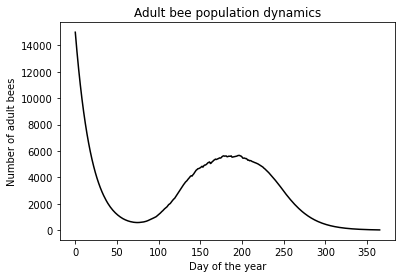

In [76]:
t = np.arange(366)
#plt.legend(loc = 'upper right')
plt.plot(t, BEESadultArray,color = 'black', label = 'Model')
plt.title('Adult bee population dynamics')
plt.xlabel('Day of the year')
plt.ylabel('Number of adult bees')

In [77]:
np.where(BEESadultArray<0)

(array([], dtype=int64),)

In [78]:
PUPAE(LIFESPANpupa, 0)

0

In [79]:
MORTALITYadultArray

array([0.05      , 0.05001632, 0.05012741, 0.05      , 0.05007139,
       0.05001144, 0.0500233 , 0.05000382, 0.05019084, 0.05005252,
       0.05007547, 0.05003032, 0.05004134, 0.05021659, 0.05000321,
       0.05018455, 0.05007323, 0.05003029, 0.05008072, 0.05000025,
       0.05002996, 0.05003913, 0.05018483, 0.05044246, 0.05008002,
       0.0501043 , 0.0501204 , 0.05018574, 0.0500008 , 0.05018454,
       0.05013209, 0.05054448, 0.05002906, 0.05034749, 0.05028193,
       0.05023937, 0.05081786, 0.05002152, 0.05158774, 0.05049114,
       0.05009323, 0.05053464, 0.05056051, 0.05027746, 0.05022149,
       0.05000183, 0.05006177, 0.0502205 , 0.05006128, 0.05016478,
       0.05000231, 0.05039927, 0.05104788, 0.05075216, 0.05086403,
       0.05216839, 0.05235507, 0.05027414, 0.05112127, 0.05082202,
       0.0504559 , 0.0502726 , 0.05217865, 0.05101207, 0.05113534,
       0.05045542, 0.05279091, 0.05184316, 0.05562923, 0.05319999,
       0.0511417 , 0.05052679, 0.05097642, 0.05198096, 0.05655